# Análisis del conjunto de datos descargado

In [ ]:
pip install Pillow

In [6]:
import os

# Ruta completa de la carpeta que deseas listar
train_image_folder = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge\Photos'
test_image_folder = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge_TestDataset'

# Cambiar el directorio de trabajo actual al de la carpeta deseada
os.chdir(train_image_folder)

# Lista todos los archivos en la carpeta actual
archivos = os.listdir()

# Itera a través de la lista de archivos
for archivo in archivos:
    print(archivo)


.DS_Store
Benign
InSitu
Invasive
microscopy_ground_truth.csv
Normal


# Lectura de una única imagen

In [13]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from PIL.ExifTags import TAGS
import pathlib
import csv
import glob
from PIL import Image
import pandas as pd

image_root = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge\Test3\train'
image_bening = r'Benign\b010.tif'
image_normal = r'Normal\n010.tif'
image_invassive = r'Invasive\iv010.tif'
image_insitu = r'InSitu\is010.tif'


Alto: 1536, Largo: 2048, Canales: 3
Alto: 1536, Largo: 2048, Canales: 3
Alto: 1536, Largo: 2048, Canales: 3
Alto: 1536, Largo: 2048, Canales: 3


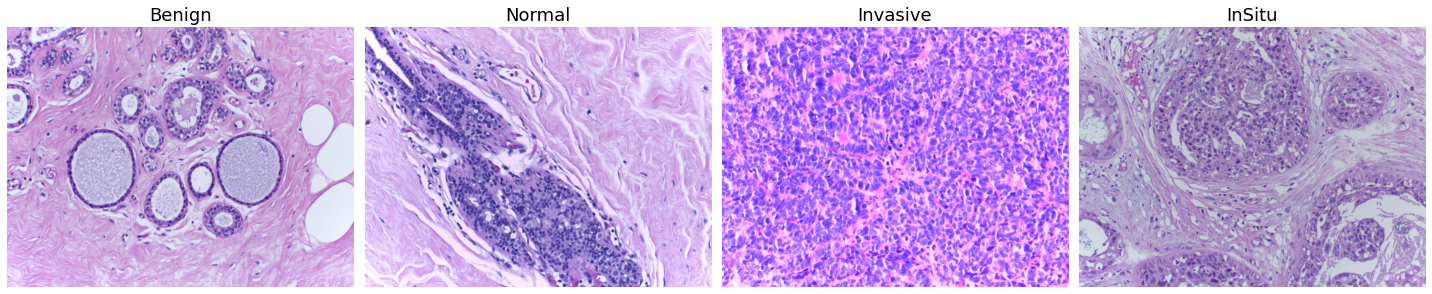

In [16]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

# Rutas de las imágenes

# Lista de nombres de imágenes
image_paths = [image_bening, image_normal, image_invassive, image_insitu]
image_titles = ['Benign', 'Normal', 'Invasive', 'InSitu']

# Crear una fila con cuatro subgráficos
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Mostrar cada imagen en su posición correspondiente
for i in range(4):
    # Construir la ruta completa de la imagen
    full_path = os.path.join(image_root, image_paths[i])

    # Lee la imagen usando Pillow (PIL)
    im = Image.open(full_path)

    # Convierte la imagen de Pillow en un objeto NumPy ndarray
    img = np.array(im)

    # Obtiene las dimensiones de la imagen
    alto, largo, canales = img.shape

    # Imprime las dimensiones y el número de canales
    print(f"Alto: {alto}, Largo: {largo}, Canales: {canales}")

    # Muestra la imagen en la posición correspondiente
    axs[i].imshow(img)
    axs[i].axis('off')
    
    # Agrega el título a la imagen con un tamaño de fuente más grande
    axs[i].set_title(image_titles[i], fontsize=18)

# Ajusta el diseño para evitar superposiciones
plt.tight_layout()

# Muestra el gráfico (plot)
plt.show()


C:\Users\beltr\anaconda3\lib\site-packages\skimage\_shared\utils.py:394: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


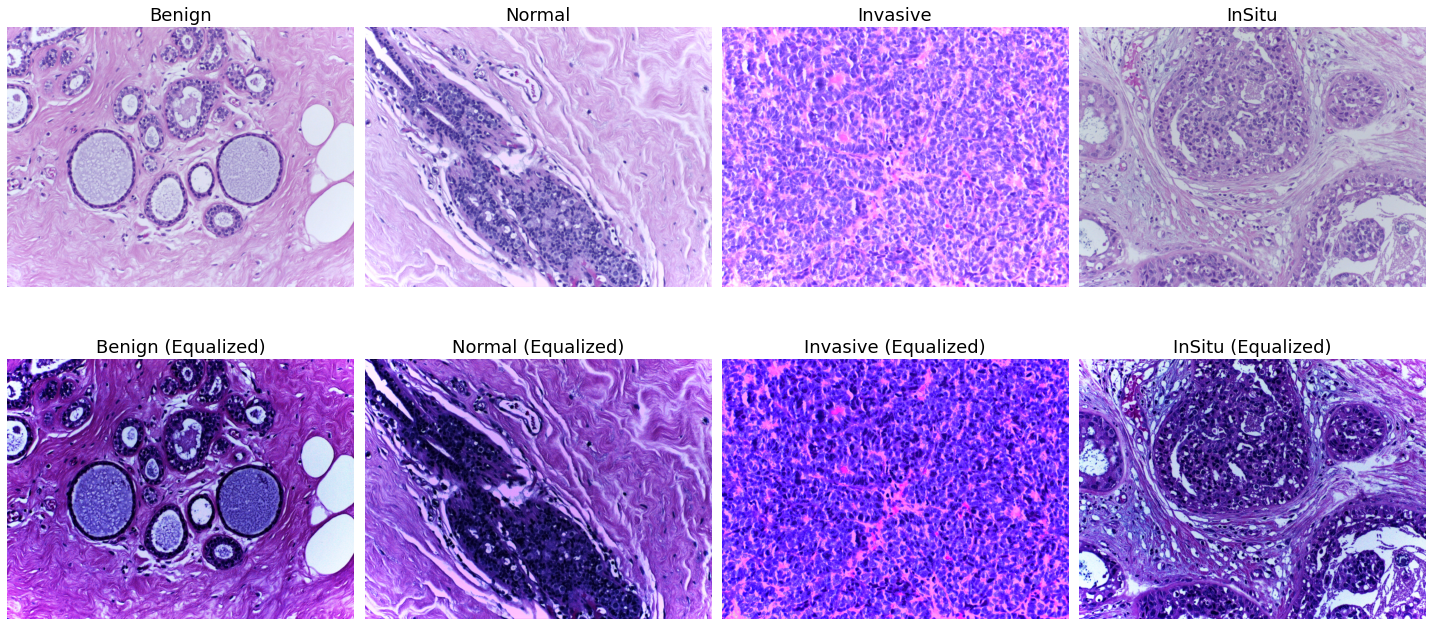

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage import exposure
import os
# Rutas de las imágenes
image_root = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge\Test3\train'
image_bening = r'Benign\b010.tif'
image_normal = r'Normal\n010.tif'
image_invassive = r'Invasive\iv010.tif'
image_insitu = r'InSitu\is010.tif'

# Lista de nombres de imágenes
image_paths = [image_bening, image_normal, image_invassive, image_insitu]
image_titles = ['Benign', 'Normal', 'Invasive', 'InSitu']

# Crear una fila con ocho subgráficos (dos filas, cuatro columnas)
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Iterar sobre las imágenes y aplicar la corrección de color
for i in range(4):
    # Construir la ruta completa de la imagen
    full_path = os.path.join(image_root, image_paths[i])

    # Leer la imagen usando Pillow (PIL)
    im = Image.open(full_path)

    # Convertir la imagen de Pillow en un objeto NumPy ndarray
    img = np.array(im)

    # Aplicar la ecualización de histograma para la corrección de color
    img_equalized = exposure.equalize_hist(img)

    # Mostrar la imagen original en la primera fila
    axs[0, i].imshow(img)
    axs[0, i].axis('off')
    axs[0, i].set_title(image_titles[i], fontsize=18)

    # Mostrar la imagen con corrección de color en la segunda fila
    axs[1, i].imshow(img_equalized)
    axs[1, i].axis('off')
    axs[1, i].set_title(f'{image_titles[i]} (Equalized)', fontsize=18)

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()

# Mostrar el gráfico (plot)
plt.show()


In [18]:
df

,Imagen,Media antes,Desviación estándar antes,Media después,Desviación estándar después
0,Benign,193.441387,36.847329,189.593974,39.150287
1,Normal,197.361043,46.223802,191.646836,50.806334
2,Invasive,192.059380,62.691650,187.563622,67.169624
3,InSitu,170.946375,31.866941,160.160733,35.956061


In [8]:
import numpy as np
from PIL import Image
import os

# Rutas de las imágenes
image_root = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge\Test3\train'
image_bening = r'Benign\b010.tif'
image_normal = r'Normal\n010.tif'
image_invassive = r'Invasive\iv010.tif'
image_insitu = r'InSitu\is010.tif'

# Lista de nombres de imágenes
image_paths = [image_bening, image_normal, image_invassive, image_insitu]
image_titles = ['Benign', 'Normal', 'Invasive', 'InSitu']

# Iterar sobre las imágenes y obtener el rango de valores
for i in range(4):
    # Construir la ruta completa de la imagen
    full_path = os.path.join(image_root, image_paths[i])

    # Leer la imagen usando Pillow (PIL)
    img = np.array(Image.open(full_path))

    # Obtener el rango de valores
    min_value = np.min(img)
    max_value = np.max(img)

    print(f"Rango de valores en {image_titles[i]}: {min_value} a {max_value}")


Rango de valores en Benign: 15 a 255
Rango de valores en Normal: 23 a 255
Rango de valores en Invasive: 17 a 255
Rango de valores en InSitu: 29 a 255


In [27]:
import os
import numpy as np
from PIL import Image
from skimage import exposure

# Ruta de origen y destino
ruta_origen = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge\Test2'
ruta_destino = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge\Test4'

# Lista de carpetas en el primer nivel
carpetas_primer_nivel = ['train', 'val', 'test']

# Lista de carpetas en el segundo nivel
carpetas_segundo_nivel = ['Benign', 'InSitu', 'Invasive', 'Normal']

# Iterar sobre las carpetas en el primer nivel
for carpeta_primer_nivel in carpetas_primer_nivel:
    # Ruta completa de la carpeta de origen en el primer nivel
    ruta_origen_primer_nivel = os.path.join(ruta_origen, carpeta_primer_nivel)

    # Ruta completa de la carpeta de destino en el primer nivel
    ruta_destino_primer_nivel = os.path.join(ruta_destino, carpeta_primer_nivel)

    # Crear la carpeta de destino en el primer nivel si no existe
    os.makedirs(ruta_destino_primer_nivel, exist_ok=True)

    # Iterar sobre las carpetas en el segundo nivel
    for carpeta_segundo_nivel in carpetas_segundo_nivel:
        # Ruta completa de la carpeta de origen en el segundo nivel
        ruta_origen_segundo_nivel = os.path.join(ruta_origen_primer_nivel, carpeta_segundo_nivel)

        # Ruta completa de la carpeta de destino en el segundo nivel
        ruta_destino_segundo_nivel = os.path.join(ruta_destino_primer_nivel, carpeta_segundo_nivel)

        # Crear la carpeta de destino en el segundo nivel si no existe
        os.makedirs(ruta_destino_segundo_nivel, exist_ok=True)

        # Iterar sobre los archivos en la carpeta de origen
        for archivo in os.listdir(ruta_origen_segundo_nivel):
            # Ignorar archivos que no son imágenes TIFF
            if archivo.endswith(('.tiff', '.tif')):
                # Construir la ruta completa del archivo de origen
                ruta_origen_archivo = os.path.join(ruta_origen_segundo_nivel, archivo)

                # Leer la imagen usando Pillow (PIL)
                im = Image.open(ruta_origen_archivo)

                # Convertir la imagen de Pillow en un objeto NumPy ndarray
                img = np.array(im)

                # Aplicar la ecualización de histograma para la corrección de color
                img_equalized = exposure.equalize_hist(img)

                # Aplicar la normalización de intensidad de píxeles para la corrección de color
                img_normalized = exposure.rescale_intensity(img_equalized, in_range=(0, 255), out_range=(0, 255))

                # Asegurarse de que los valores estén en el rango [0, 255]
                img_normalized = np.clip(img_normalized, 0, 255).astype(np.uint8)

                # Convertir el ndarray de nuevo a una imagen de Pillow
                img_normalized_pil = Image.fromarray(img_normalized)

                # Construir la ruta completa del archivo de destino para la imagen final
                ruta_destino_final = os.path.join(ruta_destino_segundo_nivel, 'final_' + archivo)

                # Guardar la imagen final en la carpeta de destino con el nuevo nombre
                img_normalized_pil.save(ruta_destino_final)

print("Proceso completado.")


Proceso completado.


In [30]:
import os
import numpy as np
from PIL import Image
from skimage import exposure

# Ruta de origen y destino
ruta_origen = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge_TestDataset\Photos'
ruta_destino = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge_TestDataset\PhotosProcessed'

# Obtener todas las rutas de archivo en la carpeta de origen
rutas_archivos = [os.path.join(root, archivo) for root, dirs, archivos in os.walk(ruta_origen) for archivo in archivos if archivo.endswith(('.tiff', '.tif'))]

# Iterar sobre las rutas de archivo y procesar cada imagen
for ruta_origen_archivo in rutas_archivos:
    # Leer la imagen usando Pillow (PIL)
    im = Image.open(ruta_origen_archivo)

    # Convertir la imagen de Pillow en un objeto NumPy ndarray
    img = np.array(im)

    # Aplicar la ecualización de histograma para la corrección de color
    img_equalized = exposure.equalize_hist(img)

    # Aplicar la normalización de intensidad de píxeles para la corrección de color
    img_normalized = exposure.rescale_intensity(img_equalized, in_range=(0, 255), out_range=(0, 255))

    # Asegurarse de que los valores estén en el rango [0, 255]
    img_normalized = np.clip(img_normalized, 0, 255).astype(np.uint8)

    # Convertir el ndarray de nuevo a una imagen de Pillow
    img_normalized_pil = Image.fromarray(img_normalized)

    # Construir la ruta completa del archivo de destino para la imagen final
    ruta_destino_final = os.path.join(ruta_destino, 'final_' + os.path.basename(ruta_origen_archivo))

    # Guardar la imagen final en la carpeta de destino con el nuevo nombre
    img_normalized_pil.save(ruta_destino_final)

print("Proceso completado.")


Proceso completado.


In [19]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


Imprimimos los metadatos de la imagen

In [27]:
from PIL import Image
import pandas as pd
from tabulate import tabulate
import os


image = Image.open(full_path)

# Extraer metadatos
info_dict = {
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1),
}

# Crear un DataFrame de pandas a partir del diccionario
metadata_table = pd.DataFrame([info_dict])
metadata_table_transposed = metadata_table.transpose()

# Imprimir la tabla
print(metadata_table_transposed)
# Imprimir la tabla de manera más bonita
print(tabulate(metadata_table_transposed,  tablefmt='pretty'))


                              0
Image Size         (2048, 1536)
Image Height               1536
Image Width                2048
Image Format               TIFF
Image Mode                  RGB
Image is Animated         False
Frames in Image               1
+-------------------+--------------+
|    Image Size     | (2048, 1536) |
|   Image Height    |     1536     |
|    Image Width    |     2048     |
|   Image Format    |     TIFF     |
|    Image Mode     |     RGB      |
| Image is Animated |    False     |
|  Frames in Image  |      1       |
+-------------------+--------------+


In [34]:
import os
from PIL import Image
import numpy as np

# Path to the folder containing subfolders with images
main_folder = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\Dataset\Train'

# Arrays to store calculated values
means = []
mins = []
maxs = []
std_deviation = []

image_paths = []  # Se añade la inicialización de la lista image_paths

# Iterate through all subfolders and files in the main folder
for root_directory, subdirectories, files in os.walk(main_folder):
    for image_name in files:
        # Build the full path to the image
        if image_name.lower().endswith((".tif", ".tiff", ".jpeg", ".jpg", ".png")):  # Se corrige file por image_name
            image_path = os.path.join(root_directory, image_name)
            # Check if the path is a folder
            if os.path.isdir(image_path):
                continue
            # Open the image
            image = Image.open(image_path)
            # Convert the image to a NumPy array
            pixels = np.asarray(image)
            # Calculate the global mean
            mean = pixels.mean()
            means.append(mean)
            std_deviation = pixels.std()
            percentiles = np.percentile(pixels, [25, 50, 75])

            # Calculate the minimum and maximum values
            if pixels.size > 0:
                min_value = pixels.min()
                max_value = pixels.max()
                mins.append(min_value)
                maxs.append(max_value)

            # Close the image to free up resources
            image.close()

#


In [35]:
# Calcula el valor mínimo y máximo a partir de las listas mins y maxs
min_value_overall = min(mins)
max_value_overall = max(maxs)

# Muestra los resultados
print(f"Valor mínimo en todo el conjunto de datos: {min_value_overall}")
print(f"Valor máximo en todo el conjunto de datos: {max_value_overall}")


Valor mínimo en todo el conjunto de datos: 0
Valor máximo en todo el conjunto de datos: 255


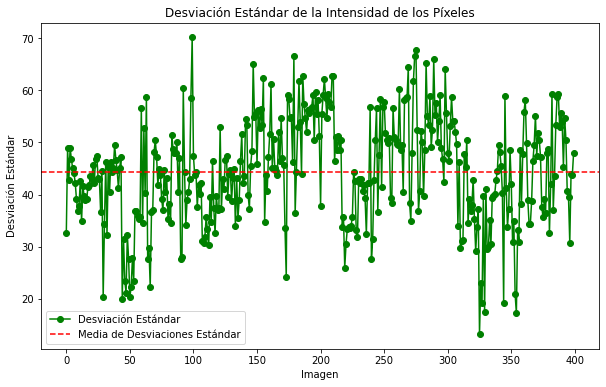

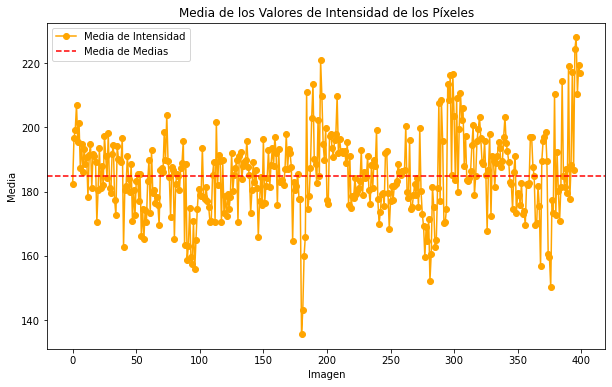

Valor Mínimo de Píxel: 0
Valor Máximo de Píxel: 255


In [33]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Path to the folder containing subfolders with images
main_folder = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\Dataset\Train'

# Arrays to store calculated values
means = []
std_devs = []
histograms = []
min_pixel_values = []
max_pixel_values = []

# Iterate through all subfolders and files in the main folder
for root_directory, subdirectories, files in os.walk(main_folder):
    for image_name in files:
        if image_name.lower().endswith((".tif", ".tiff", ".jpeg", ".jpg", ".png")):
            image_path = os.path.join(root_directory, image_name)
            if os.path.isdir(image_path):
                continue
            image = Image.open(image_path)
            pixels = np.asarray(image)
            mean = pixels.mean()
            std_dev = pixels.std()
            min_pixel = pixels.min()
            max_pixel = pixels.max()
            means.append(mean)
            std_devs.append(std_dev)
            histograms.append(np.histogram(pixels.flatten(), bins=256, range=[0, 256])[0])
            min_pixel_values.append(min_pixel)
            max_pixel_values.append(max_pixel)
            image.close()

# Plot Standard Deviations
plt.figure(figsize=(10, 6))
plt.plot(std_devs, marker='o', linestyle='-', color='green', label='Desviación Estándar')
plt.axhline(np.mean(std_devs), color='red', linestyle='--', label='Media de Desviaciones Estándar')
plt.title('Desviación Estándar de la Intensidad de los Píxeles')
plt.xlabel('Imagen')
plt.ylabel('Desviación Estándar')
plt.legend()
plt.show()

# Plot Means
plt.figure(figsize=(10, 6))
plt.plot(means, marker='o', linestyle='-', color='orange', label='Media de Intensidad')
plt.axhline(np.mean(means), color='red', linestyle='--', label='Media de Medias')
plt.title('Media de los Valores de Intensidad de los Píxeles')
plt.xlabel('Imagen')
plt.ylabel('Media')
plt.legend()
plt.show()

# Print Min and Max Pixel Values
print('Valor Mínimo de Píxel:', min(min_pixel_values))
print('Valor Máximo de Píxel:', max(max_pixel_values))


In [31]:

# Calcula estadísticas resumidas sobre el conjunto total de imágenes
mean_total = np.mean(means)
min_total = np.min(mins)
max_total = np.max(maxs)

print(f'Media de los valores globales en todas las imágenes: {mean_total:.3f}')
print(f'Min en todas las imágenes: {min_total:.3f}')
print(f'Max en todas las imágenes: {max_total:.3f}')


C:\Users\beltr\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\beltr\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ValueError: zero-size array to reduction operation minimum which has no identity

# PREPROCESADO DE LAS IMAGENES DE ENTRENAMIENTO TEST Y VALIDACION


In [ ]:
import os
import numpy as np
from PIL import Image
from skimage import exposure

# Ruta de origen y destino
ruta_origen = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge\Test3'
ruta_destino = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge\Test4'

# Lista de carpetas en el primer nivel
carpetas_primer_nivel = ['train', 'valid', 'test']

# Lista de carpetas en el segundo nivel
carpetas_segundo_nivel = ['Benign', 'InSitu', 'Invasive', 'Normal']

# Iterar sobre las carpetas en el primer nivel
for carpeta_primer_nivel in carpetas_primer_nivel:
    # Ruta completa de la carpeta de origen en el primer nivel
    ruta_origen_primer_nivel = os.path.join(ruta_origen, carpeta_primer_nivel)

    # Ruta completa de la carpeta de destino en el primer nivel
    ruta_destino_primer_nivel = os.path.join(ruta_destino, carpeta_primer_nivel)

    # Crear la carpeta de destino en el primer nivel si no existe
    os.makedirs(ruta_destino_primer_nivel, exist_ok=True)

    # Iterar sobre las carpetas en el segundo nivel
    for carpeta_segundo_nivel in carpetas_segundo_nivel:
        # Ruta completa de la carpeta de origen en el segundo nivel
        ruta_origen_segundo_nivel = os.path.join(ruta_origen_primer_nivel, carpeta_segundo_nivel)

        # Ruta completa de la carpeta de destino en el segundo nivel
        ruta_destino_segundo_nivel = os.path.join(ruta_destino_primer_nivel, carpeta_segundo_nivel)

        # Crear la carpeta de destino en el segundo nivel si no existe
        os.makedirs(ruta_destino_segundo_nivel, exist_ok=True)

        # Iterar sobre los archivos en la carpeta de origen
        for archivo in os.listdir(ruta_origen_segundo_nivel):
            # Ignorar archivos que no son imágenes TIFF
            if archivo.endswith(('.tiff', '.tif')):
                # Construir la ruta completa del archivo de origen
                ruta_origen_archivo = os.path.join(ruta_origen_segundo_nivel, archivo)

                # Leer la imagen usando Pillow (PIL)
                im = Image.open(ruta_origen_archivo)

                # Convertir la imagen de Pillow en un objeto NumPy ndarray
                img = np.array(im)

                # Aplicar la ecualización de histograma para la corrección de color
                img_equalized = exposure.equalize_hist(img)

                # Ajustar el rango de valores para que esté en [0, 255]
                img_equalized = (img_equalized * 255).astype(np.uint8)

                # Aplicar la normalización de intensidad de píxeles para la corrección de color
                img_normalized = exposure.rescale_intensity(img_equalized, in_range=(0, 255), out_range=(0, 255))

                # Asegurarse de que los valores estén en el rango [0, 255]
                img_normalized = np.clip(img_normalized, 0, 255).astype(np.uint8)

                # Convertir el ndarray de nuevo a una imagen de Pillow
                img_normalized_pil = Image.fromarray(img_normalized)

                # Construir la ruta completa del archivo de destino para la imagen final
                ruta_destino_final = os.path.join(ruta_destino_segundo_nivel, 'final_' + archivo)

                # Guardar la imagen final en la carpeta de destino con el nuevo nombre
                img_normalized_pil.save(ruta_destino_final)

print("Proceso completado.")


# Preprocesado de las iamgenes de Test 

Creación de iamgenes equalizadas

In [31]:
import os
import numpy as np
from PIL import Image
from skimage import exposure

# Ruta de origen y destino
ruta_origen = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge_TestDataset\Photos'
ruta_destino = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\ICIAR2018_BACH_Challenge_TestDataset\PhotosProcessed'

# Iterar sobre los archivos en la carpeta de origen
for archivo in os.listdir(ruta_origen):
    # Ignorar archivos que no son imágenes TIFF
    if archivo.endswith(('.tiff', '.tif')):
        # Construir la ruta completa del archivo de origen
        ruta_origen_archivo = os.path.join(ruta_origen, archivo)

        # Leer la imagen usando Pillow (PIL)
        im = Image.open(ruta_origen_archivo)

        # Convertir la imagen de Pillow en un objeto NumPy ndarray
        img = np.array(im)

        # Aplicar la ecualización de histograma para la corrección de color
        img_equalized = exposure.equalize_hist(img)

        # Ajustar el rango de valores para que esté en [0, 255]
        img_equalized = (img_equalized * 255).astype(np.uint8)

        # Aplicar la normalización de intensidad de píxeles para la corrección de color
        img_normalized = exposure.rescale_intensity(img_equalized, in_range=(0, 255), out_range=(0, 255))

        # Asegurarse de que los valores estén en el rango [0, 255]
        img_normalized = np.clip(img_normalized, 0, 255).astype(np.uint8)

        # Convertir el ndarray de nuevo a una imagen de Pillow
        img_normalized_pil = Image.fromarray(img_normalized)

        # Construir la ruta completa del archivo de destino para la imagen final
        ruta_destino_final = os.path.join(ruta_destino, 'final_' + archivo)

        # Guardar la imagen final en la carpeta de destino con el nuevo nombre
        img_normalized_pil.save(ruta_destino_final)

print("Proceso completado.")


Proceso completado.


In [17]:
mins

[]

Tareasde preprocesado que debemos llevar a cabo antes
de usar los datos en cualquier algoritmo de aprendizaje automático y, en particular, en redes neuronales.

A continuación describimos brevemente los principales:

• Uno de los primeros pasos es garantizar que las imágenes
tengan el mismo tamaño y relación de aspecto (uniform
aspect ratio). La mayoría de los modelos de redes neuronales asumen una imagen de entrada de forma cuadrada,
lo que significa que debe verificarse si cada imagen es un
cuadrado o no, y recortarse de manera apropiada.

• Una vez que tenemos todas las imágenes en la misma relación de aspecto (ya sean cuadradas o tengan otra relación de aspecto), es el momento de escalar cada imagen de manera adecuada (image scaling).

• La normalización de los datos es un paso importante que garantiza que cada parámetro de entrada (píxel, en este caso) tenga una distribución de datos similar. Esto hace que la convergencia sea más rápida mientras se entrena la red.

• Aunque opcional, la reducción de la dimensionalidad es un paso habitual cuando trabajamos con imágenes en color. Generalmente, se opta por colapsar los canales RGB en un solo canal de escala de grises.

• Finalmente, en algunos casos es interesante aumentar el conjunto de datos de forma artificial. Para este fin, se complementa el conjunto de datos con nuevas versiones 32Editorial UOC Capítulo 2. Conceptos básicos de aprendizaje automático perturbadas de las imágenes originales. Las perturbaciones típicas incluyen: escalas, rotaciones y otras transformaciones afines. Esta operación puede ayudar a la red a generalizar mejor, evitando el sobreentrenamiento

Leemos todas las imagenes de entrenamiento en un vecor y creamos otro vector y con las etiquetas asociadas

In [ ]:
import cv2
import os
import numpy as np

# Ruta de las carpetas de las clases
clases = ["Normal", "Benign", "InSitu", "Invasive"]

# Directorio base donde se encuentran las carpetas con las imágenes
base_dir = train_image_folder

# Inicializa las listas para X_TRAIN e Y_TRAIN
X_TRAIN = []
Y_TRAIN = []

# Recorre las carpetas de clases y carga las imágenes
for i, clase in enumerate(clases):
    clase_dir = os.path.join(base_dir, clase)
    
    # Lista de archivos en la carpeta de la clase actual
    archivos = os.listdir(clase_dir)
    
    for archivo in archivos:
        # Lee la imagen usando OpenCV si es un archivo .tif
        if archivo.endswith(".tif"):
            # Lee la imagen usando OpenCV
            img_path = os.path.join(clase_dir, archivo)
            im = Image.open(imagen_ruta)          
            X_TRAIN.append(img)
            Y_TRAIN.append(i)  # Usamos el índice de la clase como etiqueta



In [ ]:
X_TRAIN

In [ ]:
# Convierte las listas a arrays de NumPy
X_TRAIN = np.array(X_TRAIN)
Y_TRAIN = np.array(Y_TRAIN)


print("Dimensión de la variable X de entrenamiento " + str(X_TRAIN.shape))
print("Dimensión de la variable Y de entrenamiento " + str(Y_TRAIN.shape))

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers



In [2]:
TRAIN_DIR = train_image_folder = r'C:\Users\beltr\Dropbox\UOC - Máster en Ciencia de Datos\TFM\Dataset\Train'


In [3]:
datagen = ImageDataGenerator(
                            horizontal_flip=True,
                            vertical_flip=True)
                                      

train_data = datagen.flow_from_directory(TRAIN_DIR,
                                                     target_size=(224,224),
                                                     batch_size=20,
                                                     class_mode = 'categorical')

Found 400 images belonging to 4 classes.


In [4]:
class_list = ["Normal", "Benign", "InSitu", "Invasive"]
print("Etiquetas del fichero de entrenamiento "  + str(train_data.class_indices))


Etiquetas del fichero de entrenamiento {'Benign': 0, 'InSitu': 1, 'Invasive': 2, 'Normal': 3}


In [5]:
batch_x, batch_y = train_data.next()
print("Dimensión del lote de imágenes:", batch_x.shape)
print("Dimensión del lote de etiquetas:", batch_y.shape)


Dimensión del lote de imágenes: (20, 224, 224, 3)
Dimensión del lote de etiquetas: (20, 4)
